In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [2]:
#load is used to load datasets of the sklearn.datasets 
digits = load_digits()

In [3]:
#"scale" function is an inbuilt function in the Python sklearn.preprocessing library which is used to change the image size by scaling each pixel value by given columns and rows.
data = scale(digits.data)

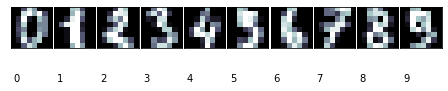

In [4]:
"""
This functio is defined to visualize some of the 10 clusters of the dataset

"""
def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)

n_digits: 10, 	 n_samples 1347, 	 n_features 64


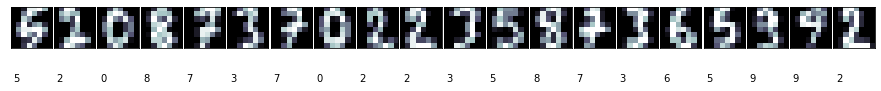

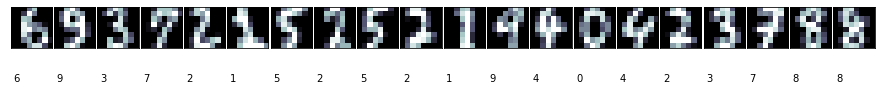

In [5]:
#returns the shape of teh first image in the dataset 
number_of_instances=digits.images.shape[0]
#Splitting the training and testing dataset (defining the target variable)
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target, digits.images.reshape(number_of_instances,64),test_size=0.25, random_state=42)
#Returns the number of samples and features in the training set 
n_samples, n_features = X_train.shape
#returns the length of the labels (y_train) of only unique values
n_digits = len(np.unique(y_train))
labels = y_train

# Reshape images back
images_train=images_train.reshape(images_train.shape[0],8,8)
images_test=images_test.reshape(images_test.shape[0],8,8)

#visualization of the different digits 
print_digits(images_train, y_train, max_n=20)
print_digits(images_test, y_test, max_n=20)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

The explained_variance_ratio_ attribute of the PCA object contains the fraction of the total variance in the original dataset that is explained by each principal component.

When we apply PCA to a high-dimensional dataset, the algorithm finds a new set of orthogonal directions (the principal components) that represent the data in a lower-dimensional space. The first principal component captures the largest amount of variation in the data, the second principal component captures the second-largest amount of variation, and so on.

The explained variance ratio for each principal component is a measure of how much of the total variation in the dataset can be explained by that component. For example, if the explained variance ratio for the first principal component is 0.6, this means that the first principal component captures 60% of the total variation in the dataset.

The sum of the explained variance ratios for all principal components is equal to 1, since they collectively account for all of the variation in the dataset.

The explained variance ratio is a useful metric for evaluating the performance of PCA because it allows us to determine how much information is preserved by reducing the dimensionality of the dataset. We typically want to retain as much of the original variation as possible while reducing the dimensionality, so a high explained variance ratio is desirable.

In [6]:
from sklearn.metrics import adjusted_rand_score


In [7]:
X_train=X_train
y_train=y_train

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import adjusted_rand_score

# Define the PCA and clustering pipelines
pca = PCA()
kmeans = KMeans()

pipeline = Pipeline(steps=[('pca', pca), ('kmeans', kmeans)])

# Define the hyperparameter grid
param_grid = {
    'pca__n_components': range(1,15),#from 1 to 14 dimentions Only
    'kmeans__n_clusters': [10],#the number of digits is Fixed 10
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__max_iter': [100, 200, 300],
}

# Define the evaluation metric
scoring = 'adjusted_rand_score'

# Perform grid search
search = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, n_jobs=-1)
search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best parameters: ", search.best_params_)
print("Best score: {:.2f}".format(search.best_score_))


Best parameters:  {'kmeans__init': 'random', 'kmeans__max_iter': 100, 'kmeans__n_clusters': 10, 'pca__n_components': 14}
Best score: 0.49


<Figure size 720x432 with 0 Axes>

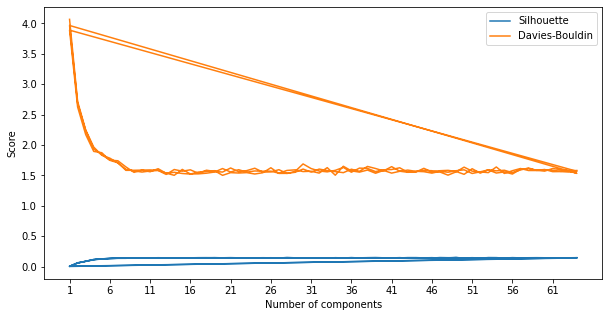

In [32]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score,make_scorer
import matplotlib.pyplot as plt

# Define the PCA and clustering pipelines
pca = PCA()
kmeans = KMeans()

pipeline = Pipeline(steps=[('pca', pca), ('kmeans', kmeans)])

# Define the hyperparameter grid
param_grid = {
    'pca__n_components': range(1,X_train.shape[1]+1),
    'kmeans__n_clusters': [10],
    'kmeans__init': ['k-means++','random'],
    'kmeans__max_iter': [100,200,300],
}

# Define the evaluation metrics
def my_silhouette_score(model, X, y=None):
    preds = model.fit_predict(X)
    return silhouette_score(X, preds) if len(set(preds)) > 1 else float('nan')
def my_davies_bouldin_score(model, X, y=None):
    preds = model.fit_predict(X)
    return davies_bouldin_score(X, preds) if len(set(preds)) > 1 else float('nan')
scoring = {
    'Silhouette': my_silhouette_score,
    'Davies-Bouldin': my_davies_bouldin_score
}

# Perform grid search
search = GridSearchCV(pipeline, param_grid=param_grid, scoring=scoring, refit=False, n_jobs=-1)
search.fit(X_train, y_train)
plt.figure(figsize=(10, 6))

# Extract the results
n_components = search.cv_results_['param_pca__n_components'].data.astype(int)
n_clusters = search.cv_results_['param_kmeans__n_clusters'].data.astype(int)
init = search.cv_results_['param_kmeans__init'].data.astype(str)
max_iter = search.cv_results_['param_kmeans__max_iter'].data.astype(int)
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(n_components, search.cv_results_['mean_test_Silhouette'], label='Silhouette')
plt.plot(n_components, search.cv_results_['mean_test_Davies-Bouldin'], label='Davies-Bouldin')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.xticks(np.arange(1, X_train.shape[1], step=5))

plt.legend()
plt.show()

